In [102]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [5]:
#data = wb.DataReader('PETR4.SA', data_source='yahoo', start='2000-1-1')

In [6]:
sheet = pd.read_excel('EMPRESAS_B3_09-07-21.xlsx', sheet_name='Página1')

In [124]:
list_df = []
list_error = []

#### Coletando os dados na api

In [125]:
for i in range(0, 30): #len(sheet)):
    try:
        list_df.append(wb.get_data_yahoo(sheet['TICK_API'][i], start='2000-1-1', interval="m"))
        list_df[i]['Ticker'] = sheet['TICK_API'][i]
    except:
        list_error.append(sheet['TICK_API'][i])

In [126]:
#removendo valores zerados e ausentes
for i in range(0, len(list_df)):
    try:
        list_df[i].replace(0, np.nan, inplace=True)
        list_df[i] = list_df[i].dropna()
    except:
        pass

In [127]:
#adicionando coluna de media
for i in range(0, len(list_df)):
    list_df[i]['Avg'] = ((list_df[i].loc[:, 'High']+list_df[i].loc[:, 'Low']) / 2.0)

In [128]:
#ordenando indices
for i in range(0, len(list_df)):
    list_df[i].sort_index()

In [129]:
df_concat = pd.DataFrame()
df_concat = list_df[0]

In [130]:
#exportando excel
for i in range(1, len(list_df)):
    pd.concat([df_concat, list_df[i]])
df_concat.to_excel('dados_b3.xlsx')

In [149]:
df_concat.tail(20)

,High,Low,Open,Close,Volume,Adj Close,Ticker,Avg
Date,,,,,,,,
2020-03-01,21.17,8.21,19.00,9.00,13930900.0,8.926089,AALR3.SA,14.690
2020-04-01,11.72,8.00,8.90,10.49,12627800.0,10.403852,AALR3.SA,9.860
2020-05-01,10.49,8.03,10.49,10.20,8981700.0,10.200000,AALR3.SA,9.260
2020-06-01,13.69,9.90,10.48,10.29,28754900.0,10.290000,AALR3.SA,11.795
2020-07-01,12.02,9.90,10.47,11.36,26454200.0,11.360000,AALR3.SA,10.960
2020-08-01,12.71,10.22,11.38,11.99,15930000.0,11.990000,AALR3.SA,11.465
2020-09-01,12.87,10.04,12.10,10.15,12121100.0,10.150000,AALR3.SA,11.455
2020-10-01,11.40,9.43,10.20,9.68,8401300.0,9.680000,AALR3.SA,10.415
2020-11-01,11.53,9.68,9.68,10.84,7807500.0,10.840000,AALR3.SA,10.605


In [146]:
list_df[13].head(2).round(2).sort_values(ascending=True, by='High' )

,High,Low,Open,Close,Volume,Adj Close,Ticker,Avg
Date,,,,,,,,
2020-07-01,9.89,9.20,9.20,9.68,1261400.0,9.68,ALPK3.SA,9.55
2020-06-01,10.57,9.14,9.44,9.30,2774100.0,9.30,ALPK3.SA,9.86


C:\Users\DAGOBE~1\AppData\Local\Temp/ipykernel_12584/379488146.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(list_df[20]['Avg'], freq=12, model='aditive')


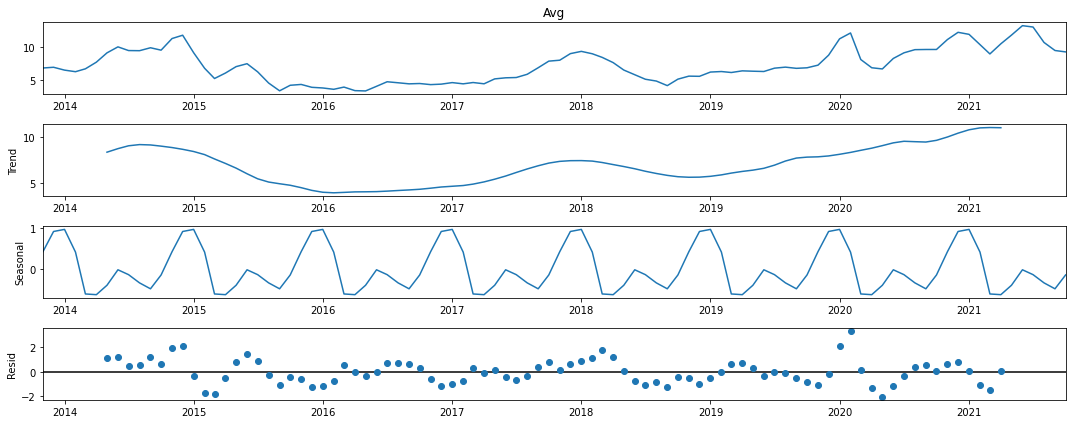

In [134]:
result = seasonal_decompose(list_df[20]['Avg'], freq=12, model='aditive')
result.plot()
plt.show()